In [149]:
import pandas as pd
import numpy as np

Importing temperature datasets

In [150]:
data1=pd.read_excel('D:/New Volume/Sem3/Advanced project 2/New folder/Book2.xlsx', sheet_name='Min',parse_dates =["Date"], index_col ="Date")
data1.columns = [str(col) + '_min' for col in data1.columns]
data2=pd.read_excel('D:/New Volume/Sem3/Advanced project 2/New folder/Book2.xlsx', sheet_name='Avg',parse_dates =["Date"], index_col ="Date")
data2.columns = [str(col) + '_avg' for col in data2.columns]
data3=pd.read_excel('D:/New Volume/Sem3/Advanced project 2/New folder/Book2.xlsx', sheet_name='Max',parse_dates =["Date"], index_col ="Date")
data3.columns = [str(col) + '_max' for col in data3.columns]

Merging temp series

In [152]:
from functools import reduce
dfs=[data1, data2, data3]
temp_merged = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
temp_merged.head()

,Cote D'Ivoire_min,Abidjan (CIV)_min,Bas-Sassandra (CIV)_min,Comoe (CIV)_min,Denguele (CIV)_min,Goh-Djiboua (CIV)_min,Lacs (CIV)_min,Lagunes (CIV)_min,Montagnes (CIV)_min,Sassandra-Marahoue (CIV)_min,...,Goh-Djiboua (CIV)_max,Lacs (CIV)_max,Lagunes (CIV)_max,Montagnes (CIV)_max,Sassandra-Marahoue (CIV)_max,Savanes (CIV)_max,Vallee du Bandama (CIV)_max,Woroba (CIV)_max,Yamoussoukro (CIV)_max,Zanzan (CIV)_max
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,16.8,21.1,22.1,20.9,14.2,21.9,20.5,19.9,16.5,18.4,...,35.4,37.8,35.9,34.7,36.0,36.3,36.8,36.0,37.7,36.5
2006-02-01,17.6,23.5,21.3,21.4,15.4,21.5,20.7,21.9,18.7,20.2,...,36.6,38.7,36.8,36.2,38.0,36.9,39.1,38.4,38.9,38.6
2006-03-01,18.2,25.1,21.8,22.8,16.2,21.5,20.2,23.1,18.0,20.6,...,35.9,38.4,35.5,36.2,37.5,38.0,39.0,39.0,38.2,39.8
2006-04-01,18.1,25.2,21.0,22.6,16.5,22.1,21.0,22.7,17.8,20.7,...,35.7,38.6,35.0,37.0,38.2,38.1,39.9,39.4,38.4,40.0
2006-05-01,19.2,23.9,22.5,22.2,15.2,22.4,21.8,22.2,19.7,21.8,...,33.9,39.0,33.0,36.8,37.7,38.6,39.8,40.0,38.9,40.6


Resampling temperature data weekely

In [153]:
re_temp = temp_merged.resample('W').mean()
re_temp

,Cote D'Ivoire_min,Abidjan (CIV)_min,Bas-Sassandra (CIV)_min,Comoe (CIV)_min,Denguele (CIV)_min,Goh-Djiboua (CIV)_min,Lacs (CIV)_min,Lagunes (CIV)_min,Montagnes (CIV)_min,Sassandra-Marahoue (CIV)_min,...,Goh-Djiboua (CIV)_max,Lacs (CIV)_max,Lagunes (CIV)_max,Montagnes (CIV)_max,Sassandra-Marahoue (CIV)_max,Savanes (CIV)_max,Vallee du Bandama (CIV)_max,Woroba (CIV)_max,Yamoussoukro (CIV)_max,Zanzan (CIV)_max
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,16.800000,21.100000,22.100000,20.900000,14.200000,21.900000,20.500000,19.900000,16.500000,18.400000,...,35.400000,37.800000,35.900000,34.700000,36.000000,36.300000,36.800000,36.000000,37.700000,36.500000
2006-01-08,22.371429,24.385714,22.428571,22.957143,22.142857,22.300000,22.442857,22.657143,21.528571,22.285714,...,31.242857,35.642857,31.142857,32.871429,33.728571,38.514286,37.357143,36.800000,34.400000,38.985714
2006-01-15,20.100000,23.371429,21.871429,22.371429,19.142857,21.800000,21.614286,21.871429,20.028571,21.057143,...,33.400000,36.614286,32.528571,33.557143,35.171429,35.614286,36.585714,36.057143,36.557143,36.514286
2006-01-22,19.971429,23.142857,22.214286,22.114286,17.300000,21.985714,21.842857,21.985714,19.985714,22.014286,...,34.685714,38.771429,34.385714,35.742857,37.200000,38.014286,38.357143,37.800000,38.542857,38.442857
2006-01-29,21.571429,24.271429,22.742857,22.742857,18.742857,22.628571,22.800000,22.685714,22.028571,23.485714,...,35.700000,39.928571,35.014286,36.157143,37.785714,39.657143,40.300000,40.842857,39.128571,41.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-09,21.757143,23.200000,21.614286,21.942857,21.471429,21.385714,21.700000,21.900000,20.685714,21.457143,...,31.228571,34.342857,30.471429,31.414286,33.257143,34.171429,34.414286,33.771429,33.942857,33.985714
2018-12-16,19.271429,22.671429,21.442857,21.542857,17.885714,21.357143,20.328571,21.800000,18.500000,19.414286,...,33.614286,36.142857,32.857143,33.014286,34.742857,35.114286,35.828571,35.142857,35.585714,36.185714
2018-12-23,18.042857,23.028571,21.814286,21.685714,15.571429,21.571429,19.871429,22.185714,17.942857,19.628571,...,34.600000,36.685714,33.642857,34.442857,36.342857,35.357143,36.757143,36.428571,36.285714,36.342857


IMporting production dataset and reindexing it on temperature data

In [154]:
data_p=pd.read_excel('D:/New Volume/Sem3/Advanced project 2/New folder/Book2.xlsx', sheet_name='Prod',parse_dates =["Date"], index_col ="Date")
data_p.sort_values(by=['Date'], inplace=True)
data_p = data_p.resample('W').mean() 
prod_data=data_p.reindex(re_temp.index)
median2 = prod_data.ffill()
prod_data.fillna(median2, inplace=True)
prod_data=prod_data.replace(0).bfill()
prod_data

,Prod
Date,
2006-01-01,715000.0
2006-01-08,715000.0
2006-01-15,750000.0
2006-01-22,750000.0
2006-01-29,750000.0
...,...
2018-12-09,689000.0
2018-12-16,766000.0
2018-12-23,836000.0


Place the DataFrames side by side

In [155]:
dfinal = pd.concat([re_temp, prod_data], axis=1)
dfinal

,Cote D'Ivoire_min,Abidjan (CIV)_min,Bas-Sassandra (CIV)_min,Comoe (CIV)_min,Denguele (CIV)_min,Goh-Djiboua (CIV)_min,Lacs (CIV)_min,Lagunes (CIV)_min,Montagnes (CIV)_min,Sassandra-Marahoue (CIV)_min,...,Lacs (CIV)_max,Lagunes (CIV)_max,Montagnes (CIV)_max,Sassandra-Marahoue (CIV)_max,Savanes (CIV)_max,Vallee du Bandama (CIV)_max,Woroba (CIV)_max,Yamoussoukro (CIV)_max,Zanzan (CIV)_max,Prod
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,16.800000,21.100000,22.100000,20.900000,14.200000,21.900000,20.500000,19.900000,16.500000,18.400000,...,37.800000,35.900000,34.700000,36.000000,36.300000,36.800000,36.000000,37.700000,36.500000,715000.0
2006-01-08,22.371429,24.385714,22.428571,22.957143,22.142857,22.300000,22.442857,22.657143,21.528571,22.285714,...,35.642857,31.142857,32.871429,33.728571,38.514286,37.357143,36.800000,34.400000,38.985714,715000.0
2006-01-15,20.100000,23.371429,21.871429,22.371429,19.142857,21.800000,21.614286,21.871429,20.028571,21.057143,...,36.614286,32.528571,33.557143,35.171429,35.614286,36.585714,36.057143,36.557143,36.514286,750000.0
2006-01-22,19.971429,23.142857,22.214286,22.114286,17.300000,21.985714,21.842857,21.985714,19.985714,22.014286,...,38.771429,34.385714,35.742857,37.200000,38.014286,38.357143,37.800000,38.542857,38.442857,750000.0
2006-01-29,21.571429,24.271429,22.742857,22.742857,18.742857,22.628571,22.800000,22.685714,22.028571,23.485714,...,39.928571,35.014286,36.157143,37.785714,39.657143,40.300000,40.842857,39.128571,41.142857,750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-09,21.757143,23.200000,21.614286,21.942857,21.471429,21.385714,21.700000,21.900000,20.685714,21.457143,...,34.342857,30.471429,31.414286,33.257143,34.171429,34.414286,33.771429,33.942857,33.985714,689000.0
2018-12-16,19.271429,22.671429,21.442857,21.542857,17.885714,21.357143,20.328571,21.800000,18.500000,19.414286,...,36.142857,32.857143,33.014286,34.742857,35.114286,35.828571,35.142857,35.585714,36.185714,766000.0
2018-12-23,18.042857,23.028571,21.814286,21.685714,15.571429,21.571429,19.871429,22.185714,17.942857,19.628571,...,36.685714,33.642857,34.442857,36.342857,35.357143,36.757143,36.428571,36.285714,36.342857,836000.0


Feature eingineering, applying pca

In [156]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [157]:
X = dfinal.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

In [158]:
pca = PCA()
X_pca = pca.fit(X_std)

Text(0, 0.5, 'cumulative explained variance')

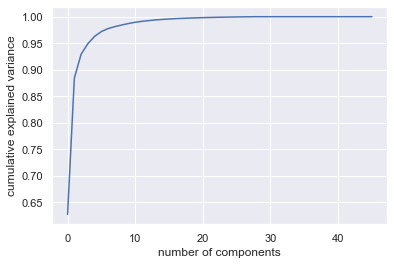

In [159]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [160]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_)

12


In [161]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = dfinal.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [162]:
print(most_important_names)

["Cote D'Ivoire_avg", 'Woroba (CIV)_min', 'Bas-Sassandra (CIV)_min', 'Prod', 'Prod', 'Abidjan (CIV)_min', 'Bas-Sassandra (CIV)_avg', 'Denguele (CIV)_min', 'Yamoussoukro (CIV)_max', 'Abidjan (CIV)_min', 'Bas-Sassandra (CIV)_min', 'Comoe (CIV)_min']


In [163]:
dfinal1=dfinal[["Cote D'Ivoire_avg", 'Woroba (CIV)_min', 'Bas-Sassandra (CIV)_min', 'Abidjan (CIV)_min', 'Bas-Sassandra (CIV)_avg', 'Denguele (CIV)_min', 'Yamoussoukro (CIV)_max', 'Abidjan (CIV)_min', 'Bas-Sassandra (CIV)_min', 'Comoe (CIV)_min','Prod','Prod']]

In [164]:
dfinal1

,Cote D'Ivoire_avg,Woroba (CIV)_min,Bas-Sassandra (CIV)_min,Abidjan (CIV)_min,Bas-Sassandra (CIV)_avg,Denguele (CIV)_min,Yamoussoukro (CIV)_max,Abidjan (CIV)_min,Bas-Sassandra (CIV)_min,Comoe (CIV)_min,Prod,Prod
Date,,,,,,,,,,,,
2006-01-01,26.400000,11.800000,22.100000,21.100000,28.300000,14.200000,37.700000,21.100000,22.100000,20.900000,715000.0,715000.0
2006-01-08,28.800000,22.385714,22.428571,24.385714,26.157143,22.142857,34.400000,24.385714,22.428571,22.957143,715000.0,715000.0
2006-01-15,27.528571,18.728571,21.871429,23.371429,26.885714,19.142857,36.557143,23.371429,21.871429,22.371429,750000.0,750000.0
2006-01-22,28.342857,18.557143,22.214286,23.142857,27.457143,17.300000,38.542857,23.142857,22.214286,22.114286,750000.0,750000.0
2006-01-29,29.914286,22.000000,22.742857,24.271429,28.285714,18.742857,39.128571,24.271429,22.742857,22.742857,750000.0,750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-09,27.342857,21.528571,21.614286,23.200000,25.557143,21.471429,33.942857,23.200000,21.614286,21.942857,689000.0,689000.0
2018-12-16,26.942857,17.214286,21.442857,22.671429,26.914286,17.885714,35.585714,22.671429,21.442857,21.542857,766000.0,766000.0
2018-12-23,26.671429,14.328571,21.814286,23.028571,27.585714,15.571429,36.285714,23.028571,21.814286,21.685714,836000.0,836000.0


Remove duplicate columns

In [165]:
dfinal1= dfinal1.loc[:,~dfinal1.columns.duplicated()]
dfinal1.shape

(680, 9)

In [166]:
dfinal1.isnull().sum()

Cote D'Ivoire_avg          0
Woroba (CIV)_min           0
Bas-Sassandra (CIV)_min    0
Abidjan (CIV)_min          0
Bas-Sassandra (CIV)_avg    0
Denguele (CIV)_min         0
Yamoussoukro (CIV)_max     0
Comoe (CIV)_min            0
Prod                       0
dtype: int64

Visualizing the series using matplotlib and seaborn

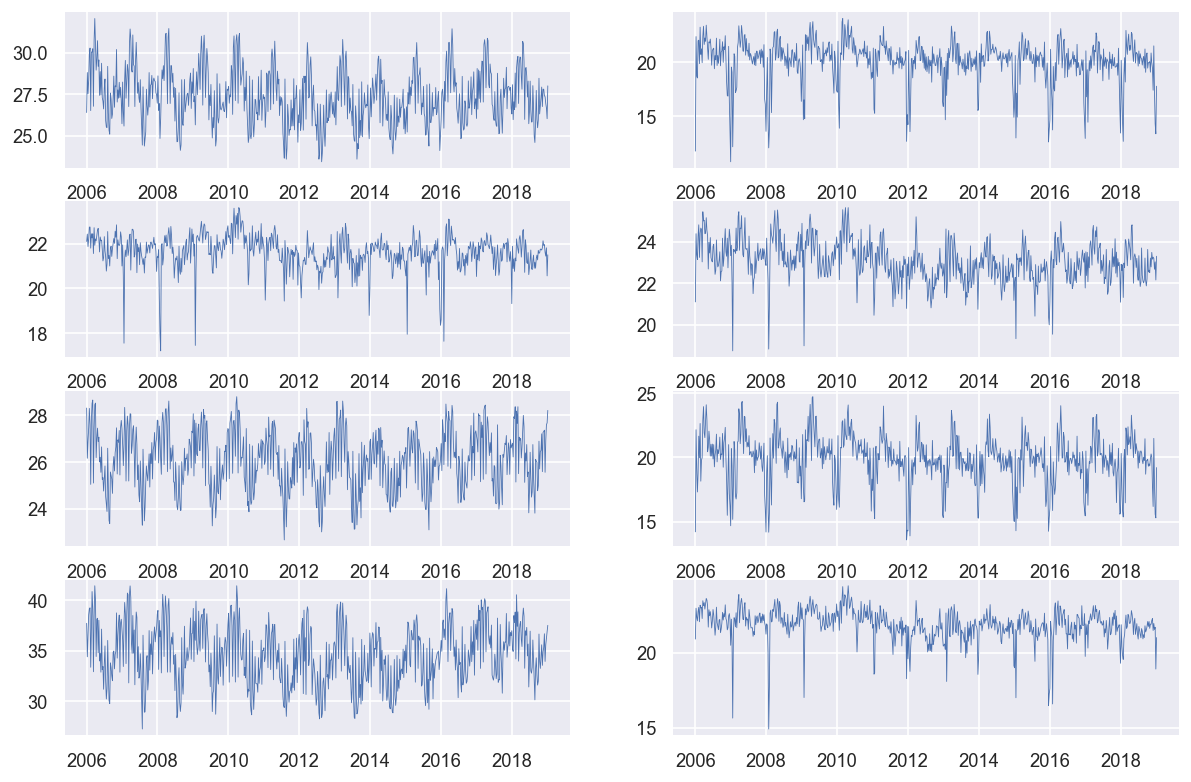

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    data = dfinal1[dfinal1.columns[i]]
    ax.plot(data, linewidth=0.5)

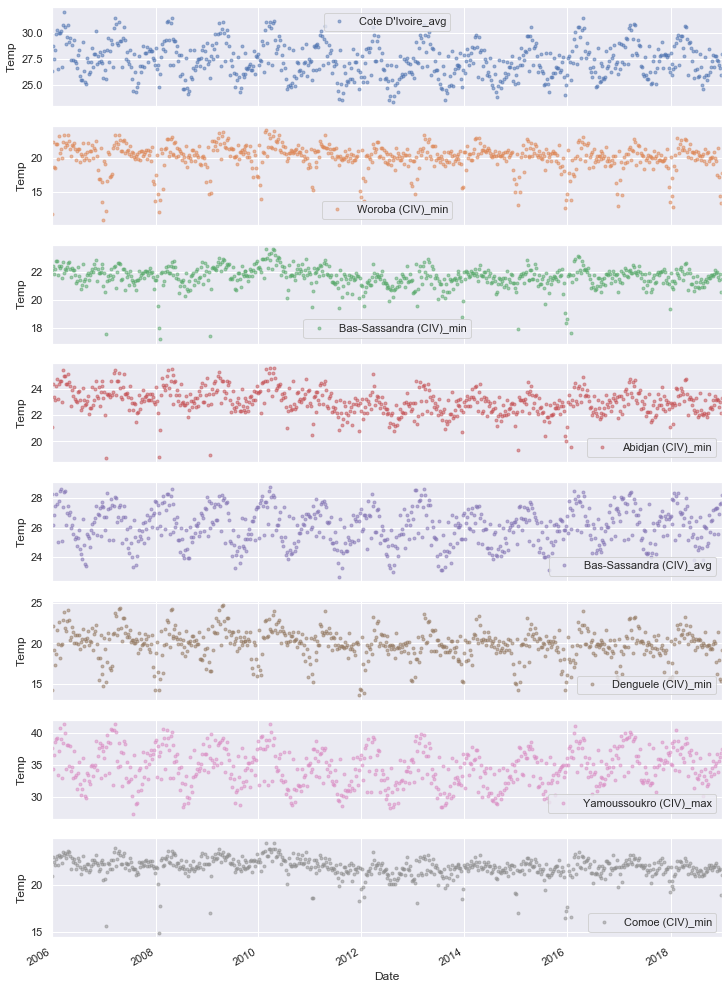

In [168]:
cols_plot = ["Cote D'Ivoire_avg",'Woroba (CIV)_min','Bas-Sassandra (CIV)_min','Abidjan (CIV)_min','Bas-Sassandra (CIV)_avg',
'Denguele (CIV)_min','Yamoussoukro (CIV)_max','Comoe (CIV)_min']
axes = dfinal1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(12, 19), subplots=True)
for ax in axes:
    ax.set_ylabel('Temp')

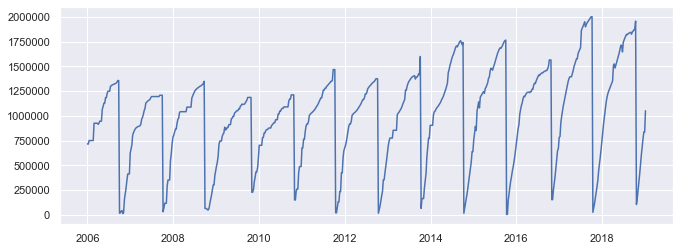

In [169]:
plt.plot(dfinal1['Prod'])
plt.show()

Granger casuality test

In [170]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dfinal1, variables = dfinal1.columns)      

,Cote D'Ivoire_avg_x,Woroba (CIV)_min_x,Bas-Sassandra (CIV)_min_x,Abidjan (CIV)_min_x,Bas-Sassandra (CIV)_avg_x,Denguele (CIV)_min_x,Yamoussoukro (CIV)_max_x,Comoe (CIV)_min_x,Prod_x
Cote D'Ivoire_avg_y,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Woroba (CIV)_min_y,0.0,1.0000,0.0003,0.0000,0.0000,0.0000,0.0000,0.0074,0.0000
Bas-Sassandra (CIV)_min_y,0.0,0.0000,1.0000,0.0083,0.0003,0.0000,0.0002,0.0059,0.0001
Abidjan (CIV)_min_y,0.0,0.0000,0.0202,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Bas-Sassandra (CIV)_avg_y,0.0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0034,0.0000,0.0000
Denguele (CIV)_min_y,0.0,0.0000,0.0320,0.0000,0.0000,1.0000,0.0000,0.1634,0.0000
Yamoussoukro (CIV)_max_y,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
Comoe (CIV)_min_y,0.0,0.0000,0.3911,0.0002,0.0001,0.0000,0.0000,1.0000,0.0000
Prod_y,0.0,0.3328,0.1466,0.0237,0.0000,0.5532,0.0000,0.2421,1.0000


ADF test for checking if series are stationery or not

In [171]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4),'n_lags':round(r[2], 4),'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)
# Print Summary
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level = {signif}')
    print(f' Test Statistic = {output["test_statistic"]}')
    print(f' No. Lags Chosen = {output["n_lags"]}')
    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [172]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
for name, column in dfinal1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "Cote D'Ivoire_avg" 
  -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level = 0.05
 Test Statistic = -6.1095
 No. Lags Chosen = 19
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Woroba (CIV)_min" 
  -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level = 0.05
 Test Statistic = -6.5917
 No. Lags Chosen = 14
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Bas-Sassandra (CIV)_min" 
  -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level = 0.05
 Test 

In [173]:
#creating the train and validation set
train = dfinal1[:int(0.8*(len(dfinal1)))]
valid = dfinal1[int(0.8*(len(dfinal1))):]


In [174]:
print(train.shape)
print(valid.shape)

(544, 9)
(136, 9)


Selecting order(p) for VAR model

In [175]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  16.763422968476526
BIC :  17.475651032553973
FPE :  19066824.621228237
HQIC:  17.041906070131777 

Lag Order = 2
AIC :  16.759855026265654
BIC :  18.115003524874844
FPE :  19003119.149545014
HQIC:  17.289764416535117 

Lag Order = 3
AIC :  16.736780115168564
BIC :  18.73667227463125
FPE :  18580315.701626424
HQIC:  17.51886936173121 

Lag Order = 4
AIC :  15.722247626297317
BIC :  18.36871526235828
FPE :  6744130.713308825
HQIC:  16.757273916228346 

Lag Order = 5
AIC :  15.439354286678542
BIC :  18.734237860623487
FPE :  5091587.560197424
HQIC:  16.72807845024652 

Lag Order = 6
AIC :  15.463386326520784
BIC :  19.408535001762576
FPE :  5229558.082109138
HQIC:  17.00657286118317 

Lag Order = 7
AIC :  15.5469346853806
BIC :  20.1442063845186
FPE :  5706858.203374935
HQIC:  17.345351779979662 

Lag Order = 8
AIC :  15.421389438499622
BIC :  20.67265090085693
FPE :  5059194.423762275
HQIC:  17.475808997660803 

Lag Order = 9
AIC :  15.307694648929694
BIC :  21.21482

In [177]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,19.28,19.35,2.364e+08,19.31
1,16.71,17.43*,1.807e+07,16.99
2,16.72,18.09,1.818e+07,17.25
3,16.69,18.71,1.769e+07,17.48
4,15.66,18.33,6.348e+06,16.71*
5,15.43,18.75,5.046e+06,16.73
6,15.44,19.41,5.117e+06,16.99
7,15.51,20.13,5.514e+06,17.32
8,15.39,20.65,4.892e+06,17.45
9,15.31*,21.22,4.553e+06*,17.62


Training the VAR Model of Selected Order(p)

In [212]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
results = model.fit(5)

print(results.summary())
# make prediction on validation
#prediction = results.forecast(results.y, steps=len(valid))

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 31, May, 2020
Time:                     14:48:44
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    18.7342
Nobs:                     539.000    HQIC:                   16.7281
Log likelihood:          -10630.2    FPE:                5.09159e+06
AIC:                      15.4394    Det(Omega_mle):     2.43640e+06
--------------------------------------------------------------------
Results for equation Cote D'Ivoire_avg
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              2.155875         2.890194            0.746           0.456
L1.Cote D'Ivoire_avg              -0.090765         0.176135           -0.515           0.

In [213]:
# Get the lag order
lag_order = results.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train.values[-lag_order:]
forecast_input

5


array([[3.04571429e+01, 2.20428571e+01, 2.21571429e+01, 2.44142857e+01,
        2.81428571e+01, 2.23428571e+01, 3.88714286e+01, 2.23714286e+01,
        1.24500000e+06],
       [2.82428571e+01, 1.94857143e+01, 2.21857143e+01, 2.35000000e+01,
        2.67714286e+01, 1.99428571e+01, 3.62857143e+01, 2.16714286e+01,
        1.24500000e+06],
       [2.76428571e+01, 2.04428571e+01, 2.21428571e+01, 2.35714286e+01,
        2.62000000e+01, 1.99571429e+01, 3.44428571e+01, 2.25142857e+01,
        1.26900000e+06],
       [2.90428571e+01, 2.19142857e+01, 2.19857143e+01, 2.39285714e+01,
        2.64142857e+01, 2.19285714e+01, 3.53714286e+01, 2.26714286e+01,
        1.26900000e+06],
       [2.79857143e+01, 2.21428571e+01, 2.22714286e+01, 2.35142857e+01,
        2.61714286e+01, 2.15857143e+01, 3.31000000e+01, 2.28714286e+01,
        1.31100000e+06]])

In [214]:
fc = results.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=dfinal1.index[-nobs:], columns=dfinal1.columns + '_forecast')
df_forecast

,Cote D'Ivoire_avg_forecast,Woroba (CIV)_min_forecast,Bas-Sassandra (CIV)_min_forecast,Abidjan (CIV)_min_forecast,Bas-Sassandra (CIV)_avg_forecast,Denguele (CIV)_min_forecast,Yamoussoukro (CIV)_max_forecast,Comoe (CIV)_min_forecast,Prod_forecast
Date,,,,,,,,,
2016-06-05,28.222154,20.537035,21.861029,23.465534,26.396133,20.708272,35.153073,22.144776,1.328304e+06
2016-06-12,27.341011,20.755122,21.710672,23.108967,25.650428,20.612037,33.782256,22.003759,1.282398e+06
2016-06-19,27.976946,20.883008,21.579290,23.192113,26.130107,20.987325,34.711140,21.903325,1.316832e+06
2016-06-26,27.052564,21.558737,21.627061,22.989834,25.191516,21.299060,32.228374,22.050336,1.294275e+06
2016-07-03,27.319507,20.627653,21.507881,22.948805,25.740992,20.494322,33.647403,21.732966,1.286634e+06
...,...,...,...,...,...,...,...,...,...
2018-12-09,27.251427,20.195905,21.615142,23.050453,25.983970,19.913595,34.275652,21.857643,9.514439e+05
2018-12-16,27.253842,20.191534,21.615184,23.051035,25.988280,19.908958,34.284558,21.856936,9.501978e+05
2018-12-23,27.256867,20.187666,21.615370,23.051923,25.992816,19.904959,34.294101,21.856477,9.490687e+05


In [201]:
df_forecast.dtypes

Cote D'Ivoire_avg_forecast          float64
Woroba (CIV)_min_forecast           float64
Bas-Sassandra (CIV)_min_forecast    float64
Abidjan (CIV)_min_forecast          float64
Bas-Sassandra (CIV)_avg_forecast    float64
Denguele (CIV)_min_forecast         float64
Yamoussoukro (CIV)_max_forecast     float64
Comoe (CIV)_min_forecast            float64
Prod_forecast                       float64
dtype: object

In [215]:
df_forecast['Prod_forecast'] = df_forecast['Prod_forecast'].round()
df_forecast

,Cote D'Ivoire_avg_forecast,Woroba (CIV)_min_forecast,Bas-Sassandra (CIV)_min_forecast,Abidjan (CIV)_min_forecast,Bas-Sassandra (CIV)_avg_forecast,Denguele (CIV)_min_forecast,Yamoussoukro (CIV)_max_forecast,Comoe (CIV)_min_forecast,Prod_forecast
Date,,,,,,,,,
2016-06-05,28.222154,20.537035,21.861029,23.465534,26.396133,20.708272,35.153073,22.144776,1328304.0
2016-06-12,27.341011,20.755122,21.710672,23.108967,25.650428,20.612037,33.782256,22.003759,1282398.0
2016-06-19,27.976946,20.883008,21.579290,23.192113,26.130107,20.987325,34.711140,21.903325,1316832.0
2016-06-26,27.052564,21.558737,21.627061,22.989834,25.191516,21.299060,32.228374,22.050336,1294275.0
2016-07-03,27.319507,20.627653,21.507881,22.948805,25.740992,20.494322,33.647403,21.732966,1286634.0
...,...,...,...,...,...,...,...,...,...
2018-12-09,27.251427,20.195905,21.615142,23.050453,25.983970,19.913595,34.275652,21.857643,951444.0
2018-12-16,27.253842,20.191534,21.615184,23.051035,25.988280,19.908958,34.284558,21.856936,950198.0
2018-12-23,27.256867,20.187666,21.615370,23.051923,25.992816,19.904959,34.294101,21.856477,949069.0


In [193]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(pred, valid):
    mape = np.mean(np.abs(pred - valid)/np.abs(valid))  # MAPE
    me = np.mean(pred - valid)             # ME
    mae = np.mean(np.abs(pred - valid))    # MAE
    mpe = np.mean((pred - valid)/valid)   # MPE
    rmse = np.mean((pred - valid)**2)**.5  # RMSE
    corr = np.corrcoef(pred, valid)[0,1]   # corr
    mins = np.amin(np.hstack([pred[:,None], 
                              valid[:,None]]), axis=1)
    maxs = np.amax(np.hstack([pred[:,None], 
                              valid[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [216]:
def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Cote D'Ivoire_avg")
accuracy_prod = forecast_accuracy(df_forecast["Cote D'Ivoire_avg_forecast"].values, valid["Cote D'Ivoire_avg"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Woroba (CIV)_min")
accuracy_prod = forecast_accuracy(df_forecast["Woroba (CIV)_min_forecast"].values, valid["Woroba (CIV)_min"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Bas-Sassandra (CIV)_min")
accuracy_prod = forecast_accuracy(df_forecast["Bas-Sassandra (CIV)_min_forecast"].values, valid["Bas-Sassandra (CIV)_min"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Abidjan (CIV)_min")
accuracy_prod = forecast_accuracy(df_forecast["Abidjan (CIV)_min_forecast"].values, valid["Abidjan (CIV)_min"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Bas-Sassandra (CIV)_avg")
accuracy_prod = forecast_accuracy(df_forecast["Bas-Sassandra (CIV)_avg_forecast"].values, valid["Bas-Sassandra (CIV)_avg"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Denguele (CIV)_min")
accuracy_prod = forecast_accuracy(df_forecast["Denguele (CIV)_min_forecast"].values, valid["Denguele (CIV)_min"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Yamoussoukro (CIV)_max")
accuracy_prod = forecast_accuracy(df_forecast["Yamoussoukro (CIV)_max_forecast"].values, valid["Yamoussoukro (CIV)_max"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Comoe (CIV)_min")
accuracy_prod = forecast_accuracy(df_forecast["Comoe (CIV)_min_forecast"].values, valid["Comoe (CIV)_min"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
def adjust(val, length= 6): return str(val).ljust(length)
print("Forecast Accuracy of: Prod_forecast")
accuracy_prod = forecast_accuracy(df_forecast["Prod_forecast"].values, valid["Prod"])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    

Forecast Accuracy of: Cote D'Ivoire_avg
mape   :  0.0414
me     :  -0.206
mae    :  1.1438
mpe    :  -0.005
rmse   :  1.3711
corr   :  0.3733
minmax :  0.0404
Forecast Accuracy of: Woroba (CIV)_min
mape   :  0.0714
me     :  0.488
mae    :  1.2436
mpe    :  0.0364
rmse   :  1.9278
corr   :  0.2957
minmax :  0.0605
Forecast Accuracy of: Bas-Sassandra (CIV)_min
mape   :  0.0189
me     :  0.0601
mae    :  0.4042
mpe    :  0.0034
rmse   :  0.5107
corr   :  0.1746
minmax :  0.0185
Forecast Accuracy of: Abidjan (CIV)_min
mape   :  0.0261
me     :  0.098
mae    :  0.5958
mpe    :  0.0053
rmse   :  0.7277
corr   :  0.298
minmax :  0.0255
Forecast Accuracy of: Bas-Sassandra (CIV)_avg
mape   :  0.0365
me     :  -0.2965
mae    :  0.9615
mpe    :  -0.0095
rmse   :  1.1262
corr   :  0.4291
minmax :  0.0358
Forecast Accuracy of: Denguele (CIV)_min
mape   :  0.0635
me     :  0.2524
mae    :  1.1908
mpe    :  0.0204
rmse   :  1.6461
corr   :  0.2688
minmax :  0.0579
Forecast Accuracy of: Yamoussoukro 

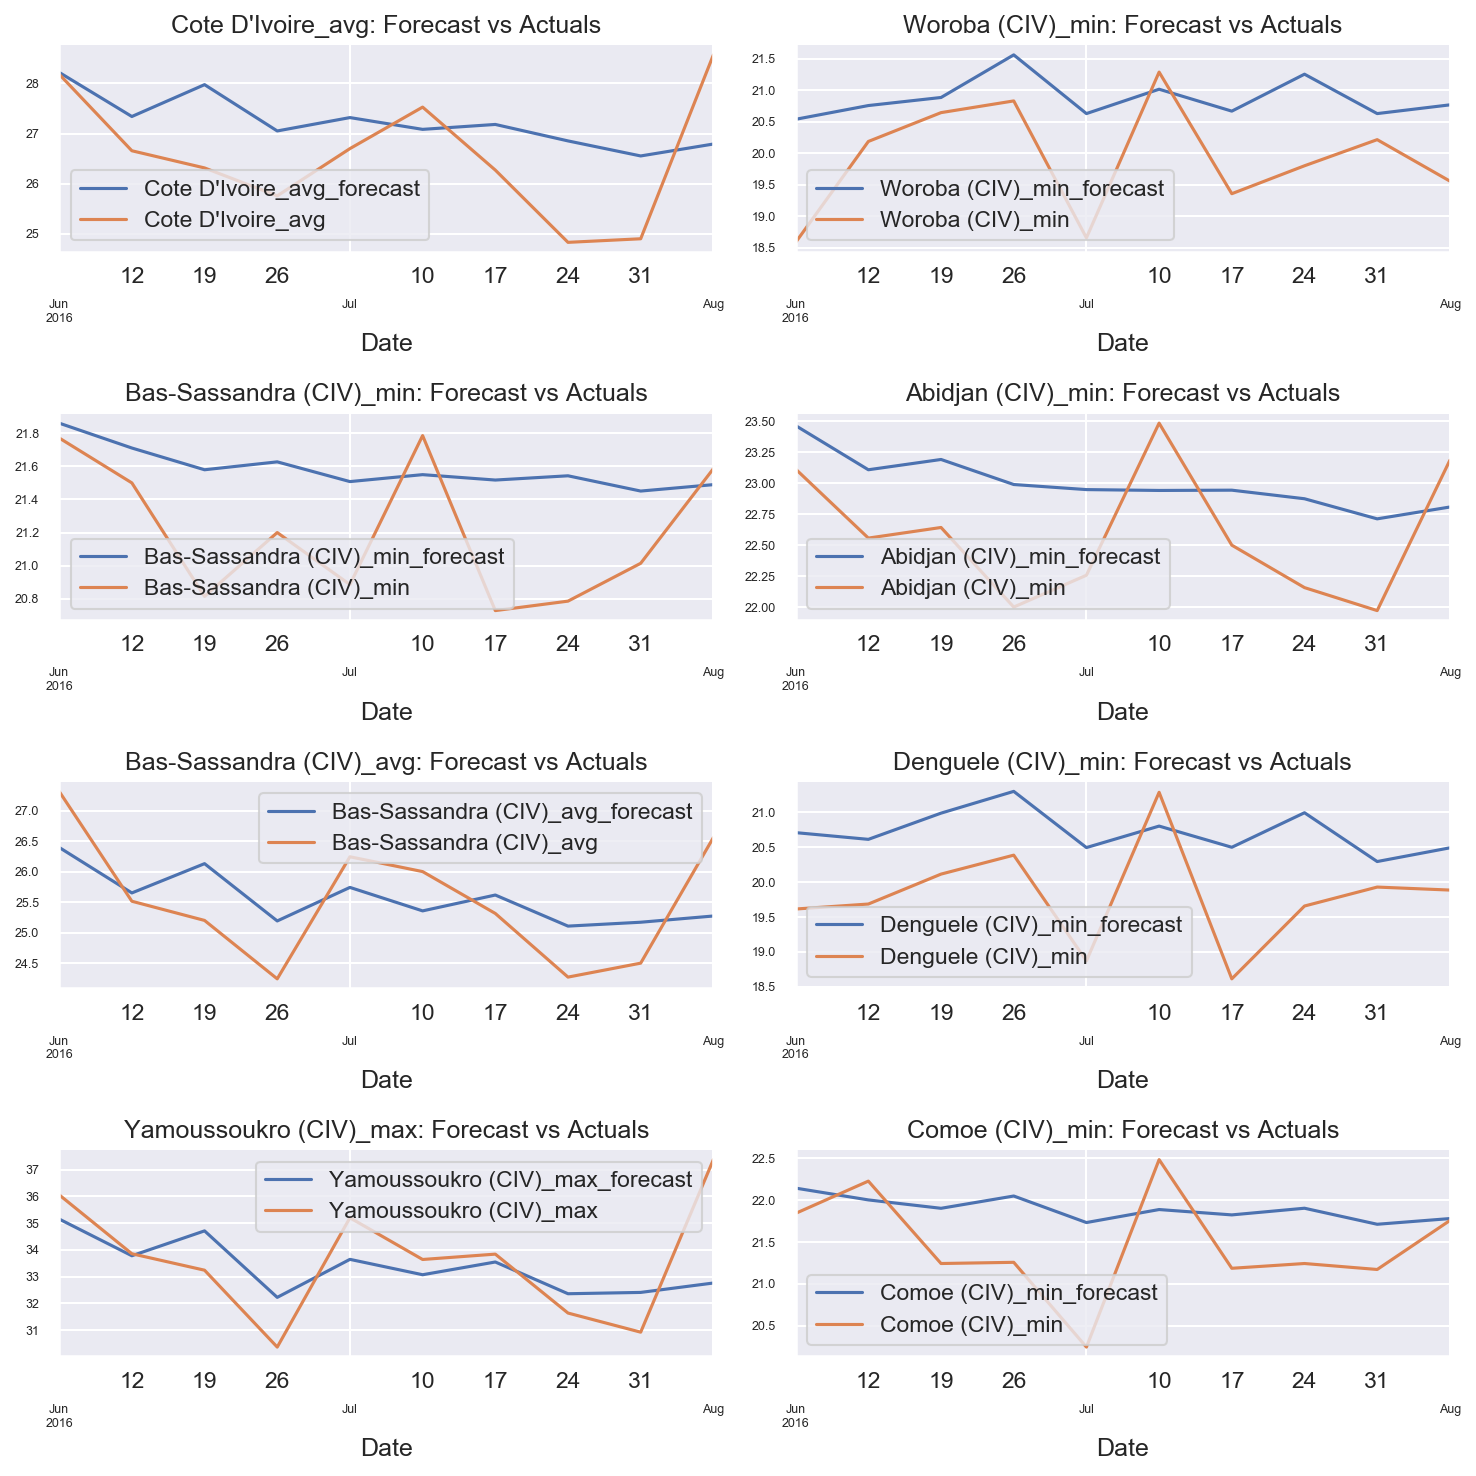

In [206]:
fig, axes = plt.subplots(nrows=int(len(dfinal1.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(dfinal1.columns, axes.flatten())):
    df_forecast[col+'_forecast'].head(10).plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    valid[col][-nobs:].head(10).plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();